In [1]:
import pickle
from jupyter_utils import jupyter_setup
jupyter_setup()
import numpy as np
import pandas as pd
from audio_processing import FeatureSet
import matplotlib.pyplot as plt
import librosa
import ipywidgets as widgets
import os
dataset_basepath = "data/Coswara_processed/pickles/"
from participant import Participant
from tqdm.notebook import tqdm

D:\Archiv\Studium\Master\6.-Semester\Masters_Thesis\Git\acoustic_covid_detection\python


In [2]:
dataset_list = os.listdir(dataset_basepath)
# dataset_list = [dataset for dataset in dataset_list if "logmel_combined_breath" in dataset and "augmented" not in dataset]

def load_dataset(path):
    dataset_basepath = "data/Coswara_processed/pickles/"
    fullpath = os.path.join(dataset_basepath, path)
    print(fullpath)
    with open(fullpath, "rb") as f:
        return pickle.load(f)
    
dropdown = widgets.Dropdown(options=dataset_list)
# dropdown.observe(print_name, names="values")
display(dropdown)

Dropdown(options=('2023_02_20_brogrammers_settings.pickle', '2023_02_20_brogrammers_settings_augmented.pickle'…

In [ ]:
dataset = load_dataset(dropdown.value)
print(dataset)

data/Coswara_processed/pickles/2023_05_04_logmel_combined_breaths_NEW_11msHop_46msFFT_fmax11000_224logmel.pickle


(0.0, 100.0)

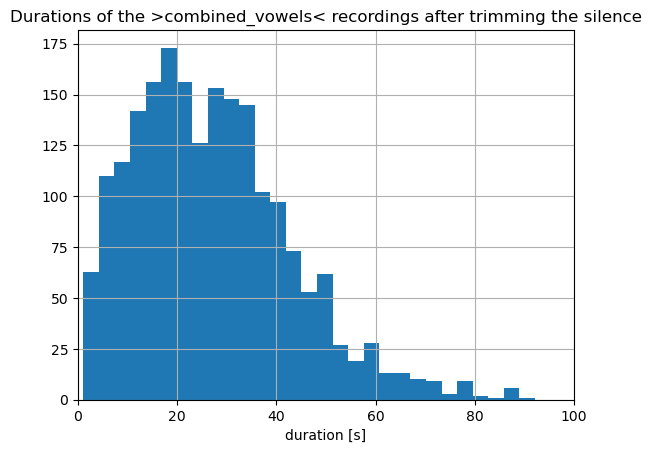

In [11]:
# plot the distribution of the durations of the recordings in the dataset
durations = [p.recordings[dataset.types_of_recording].original_duration_trimmed_silence for p in dataset.participants]
plt.hist(durations, 100), plt.title(f"Durations of the >{dataset.types_of_recording}< recordings after trimming the silence")
plt.grid(), plt.xlabel("duration [s]")
plt.xlim([0, 100])

In [8]:
dataset.participants[0].recordings['combined_breaths'].original_duration_trimmed_silence

28.42

In [30]:
df = pd.read_csv("data/Coswara_processed/full_meta_data.csv")
relevant_df = df[["audio_quality_breathing-deep", "audio_quality_breathing-shallow", "user_id"]]

In [635]:
counter = 0
a = [int(idx) for idx, _,_ in bad_amplitudes]
np.array(a)

array([   2,   11,   17,   20,   32,   35,   44,   48,   55,   56,   63,
         67,   73,   80,   86,   90,   94,  103,  108,  112,  119,  138,
        142,  147,  150,  155,  162,  163,  171,  174,  182,  189,  195,
        198,  202,  210,  217,  218,  223,  227,  250,  262,  272,  281,
        291,  293,  297,  298,  300,  307,  309,  310,  332,  335,  352,
        430,  441,  442,  446,  450,  456,  465,  467,  486,  491,  503,
        504,  506,  518,  527,  529,  538,  547,  557,  564,  565,  573,
        574,  581,  587,  590,  595,  596,  597,  606,  632,  648,  658,
        669,  671,  676,  683,  687,  691,  697,  711,  726,  735,  744,
        745,  746,  758,  763,  768,  780,  783,  795,  796,  801,  813,
        815,  825,  834,  836,  840,  842,  858,  863,  867,  885,  891,
        897,  914,  920,  928,  930,  931,  944,  948,  950,  951,  952,
        958,  966,  971,  975,  982,  983, 1003, 1004, 1005, 1006, 1012,
       1013, 1014, 1020, 1025, 1033, 1035, 1043, 10

In [12]:
idx = np.random.randint(125)
idx

97

1872
Duration of the Recording: 29.54
ZaeW7vuikQgf7984JVqXYOtUQMs2


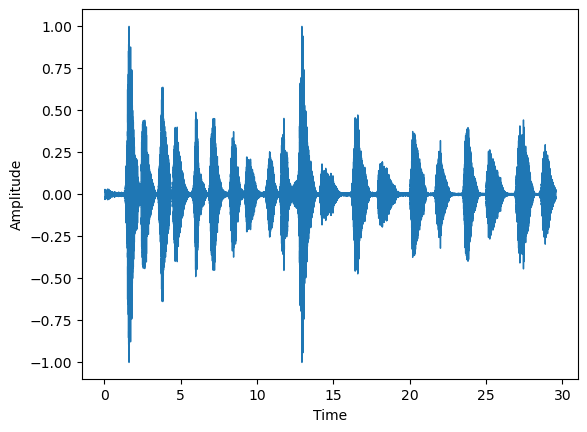

In [25]:
# idx = a[counter]
# counter += 1
idx = np.random.randint(1900)
print(idx)
participant = dataset.participants[idx].recordings[dataset.types_of_recording]
participant.show_waveform(30)    
# participant.play_audio()    
# participant.show_features()
user_id = dataset.participants[idx].id
print(user_id)
# relevant_df[relevant_df["user_id"] == user_id]

In [983]:
participant.play_audio(30)    

Duration of the Recording: 19.77


In [122]:
np.absolute(participant.get_audio()[18]).max()

Duration of the Recording: 14.86


IndexError: tuple index out of range

In [ ]:
amplitude_dict = {}
for participant in tqdm(dataset.participants):
    rec = participant.recordings[dataset.types_of_recording].get_audio()[0]
    max_amplitude = np.absolute(rec.max())
    amplitude_dict[participant.id] = max_amplitude

In [632]:
bad_amplitudes = [(i, participant_id, val) for i, (participant_id, val) in enumerate(amplitude_dict.items()) if val > 0.9]

In [ ]:
bad_amplitudes

In [21]:
amplitueds = [val for key, val in amplitude_dict.items()]

(array([147., 131., 112., 120.,  95.,  96.,  79.,  59.,  62.,  59.,  57.,
         46.,  46.,  51.,  46.,  38.,  54.,  38.,  47.,  33.,  46.,  56.,
         79.,  84.,  95.,  96.,  65.,  51.,  60., 209.]),
 array([0.        , 0.03333231, 0.06666463, 0.09999695, 0.13332926,
        0.16666158, 0.1999939 , 0.23332621, 0.2666585 , 0.29999083,
        0.33332315, 0.36665547, 0.3999878 , 0.4333201 , 0.46665242,
        0.49998474, 0.533317  , 0.5666494 , 0.59998167, 0.633314  ,
        0.6666463 , 0.69997865, 0.73331094, 0.7666433 , 0.7999756 ,
        0.8333079 , 0.8666402 , 0.89997256, 0.93330485, 0.9666372 ,
        0.9999695 ], dtype=float32),
 <BarContainer object of 30 artists>)

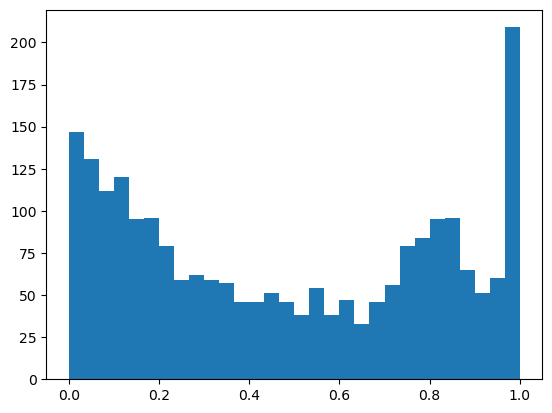

In [24]:
plt.hist(amplitueds, 30)

In [ ]:
target_length = 3000    # in miliseconds
offset = 22000              # look at the spectrogram starting at "offset" miliseconds until offset+target_length miliseconds
f = (0, 123456)       # min and max frequency to display

hopsize_ms = participant.hop_size/participant.target_sr*1000
offset_frames = int(offset // hopsize_ms)
n_frames = int(target_length // hopsize_ms)
features = participant.features
features = features[:, offset_frames:n_frames+offset_frames]
mel_frequencies = librosa.mel_frequencies(n_mels=participant.n_features, htk=True, fmin=participant.fmin, fmax=participant.fmax)
f_idx = np.logical_and(mel_frequencies > f[0], mel_frequencies < f[1])
mel_frequencies = mel_frequencies[f_idx]
features = features[f_idx]

print(features.shape)
# print(np.round(mel_frequencies))

# plt.figure()
plt.figure(figsize=(15, 9))
librosa.display.specshow(features, x_axis='time', y_axis="log", cmap="magma",
                         hop_length=participant.hop_size, sr=participant.target_sr, y_coords=mel_frequencies)
plt.colorbar(format="%+2.f dB")
plt.title(dropdown.value)

In [62]:
df = pd.read_csv("data/Coswara_processed/full_meta_data.csv")
bad_id_df = list(pd.read_excel(r"data/Coswara_processed/bad ids from listening and analysis.xlsx", sheet_name="combined_breaths", usecols=["ID"]).ID)
low_audio_quality_ids = list(df[(df["audio_quality_breathing-shallow"] == 0) | (df["audio_quality_breathing-deep"] == 0)]["user_id"])
all_bad_ids = bad_id_df+low_audio_quality_ids

In [61]:
len(dataset)

2144

In [63]:
dataset.participants = [part for part in dataset.participants if part.id not in all_bad_ids]

In [64]:
len(dataset)

1924

In [ ]:
low_audio_quality = list(df[(df["audio_quality_breathing-shallow"] == 0) | (df["audio_quality_breathing-deep"] == 0)]["user_id"])

In [60]:
len(set(low_audio_quality_ids +  bad_id_df))

678

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              2746 non-null   object 
 1   age                                  2746 non-null   int64  
 2   covid_health_status                  2746 non-null   object 
 3   record_date                          2746 non-null   object 
 4   english_proficiency                  2746 non-null   object 
 5   gender                               2746 non-null   object 
 6   country                              2746 non-null   object 
 7   local_region                         2425 non-null   object 
 8   state                                2746 non-null   object 
 9   returning_user                       2066 non-null   object 
 10  smoker                               1086 non-null   object 
 11  cold                          